This code fetches recipe data from https://www.skinnytaste.com/ and interacts with user to display recipes fall into specific user choices.

Important note:
- Always check the website's terms and robots.txt file before scraping.
- Do not request data from the website too aggressiely and ensure that your program behaves in a reasonable manner.
- Revisit the website and rewrite code as needed as the layout of the site may change.

In [5]:
from bs4 import BeautifulSoup
import requests
#import csv
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from io import BytesIO
#import requests
import matplotlib.cm as cm
from matplotlib.colors import Normalize
#import urllib.request
from IPython import get_ipython
import random


#%%-----------------------------------
#create pandas data frame
columns = ['title', 'summary', 'keys', 'green point', 'blue point', 'purple point', 'calories', 'image link', 'recipe link'];

df = pd.DataFrame([], columns = columns)  

#%% fetch posts

for page in range(30):
    page = page+1
    print('Please wait, data is being scrapped', page, '/30')
    if page == 0:
        source = requests.get('https://www.skinnytaste.com/').text
    else:
        source = requests.get('https://www.skinnytaste.com/page/'+ str(page) + '/').text
        
    # create soup object. this is the whole HTML code of the webpage
    soup = BeautifulSoup(source, 'lxml')
 
    for Post in soup.find_all('article', class_='post teaser-post odd'):
       
        Post_title= Post.h2.text

        summary = Post.p.text

# Check if the keys and points exists, if they exists fetch them, if not fill with NaN        
        rules = [Post.find('div', attrs={'class':'recipe-meta'}) is not None,
                Post.find('div', attrs = {'icons'}) is not None, 
                Post.find('span', attrs={'class':'smart-points blue'}) is not None,
                Post.find('span', attrs={'class':'smart-points green'}) is not None,
                Post.find('span', attrs={'class':'smart-points purple'}) is not None,
                Post.find('span', attrs={'class':'wprm-nutrition-wrapper'}) is not None];
                 
        rec_keys = [];
        if all(rules):         
            for div in Post.find('div', attrs = {'icons'}):
                rec_keys.append(div.find('img')['alt'])
            blue = Post.find('span', attrs={'class':'smart-points blue'}).text
            green = Post.find('span', attrs={'class':'smart-points green'}).text
            purple = Post.find('span', attrs={'class':'smart-points purple'}).text
            calories = Post.find('span', attrs={'class':'recipe-meta-value value-calories divider-right'}).text
            
        else: #advertisement
            Post_title = 'Not a recipe';
            summary = 'Not a recipe'
            rec_keys.append(np.nan)
            blue = np.nan
            purple = np.nan
            green = np.nan
            calories = np.nan


        link = Post.find('img', attrs={'class': 'attachment-teaser'})
        img_link = link.get('data-lazy-src')
        
        link = Post.find('a', attrs={'rel': 'bookmark'})
        recipe_link = link.get('href')
        

#format and add to df  
        if type(calories) == str:
            calories = calories.lower() 
            calories = calories.strip(' cals')
            
        recipe_list = [[Post_title,  summary,  rec_keys,  blue,  green,  purple,  calories,  img_link, recipe_link]];
        df2 = pd.DataFrame(recipe_list, columns = columns) 
        df = df.append(df2, ignore_index=True)
        del df2
        
# even numbers
    for Post in soup.find_all('article', class_='post teaser-post even'):
        
        Post_title= Post.h2.text

        summary = Post.p.text


# Check if the keys and points exists, if they exists fetch them, if not fill with NaN  
        rules = [Post.find('div', attrs={'class':'recipe-meta'}) is not None,
                Post.find('div', attrs = {'icons'}) is not None, 
                Post.find('span', attrs={'class':'smart-points blue'}) is not None,
                Post.find('span', attrs={'class':'smart-points green'}) is not None,
                Post.find('span', attrs={'class':'smart-points purple'}) is not None,
                Post.find('span', attrs={'class':'wprm-nutrition-wrapper'}) is not None];
                 
        rec_keys = [];
        if all(rules):         
            for div in Post.find('div', attrs = {'icons'}):
                rec_keys.append(div.find('img')['alt'])
            blue = Post.find('span', attrs={'class':'smart-points blue'}).text
            green = Post.find('span', attrs={'class':'smart-points green'}).text
            purple = Post.find('span', attrs={'class':'smart-points purple'}).text
            calories = Post.find('span', attrs={'class':'recipe-meta-value value-calories divider-right'}).text
            
        else: #advertisement
            Post_title = 'Not a recipe';
            summary = 'Not a recipe'
            rec_keys.append(np.nan)
            blue = np.nan
            purple = np.nan
            green = np.nan
            calories = np.nan


        link = Post.find('img', attrs={'class': 'attachment-teaser'})
        img_link = link.get('data-lazy-src')
        
        link = Post.find('a', attrs={'rel': 'bookmark'})
        recipe_link = link.get('href')

    
#format and add to df  
        if type(calories) == str:
            calories = calories.lower() 
            calories = calories.strip(' cals')
        
        recipe_list = [[Post_title,  summary,  rec_keys,  blue,  green,  purple,  calories,  img_link, recipe_link]];
        df2 = pd.DataFrame(recipe_list, columns = columns) 
        df = df.append(df2, ignore_index=True)
        del df2
   
print('\n\n-----------------------------------------------')       
print('Data scrapping completed \n\n')  


Please wait, data is being scrapped 1 /30
Please wait, data is being scrapped 2 /30
Please wait, data is being scrapped 3 /30
Please wait, data is being scrapped 4 /30
Please wait, data is being scrapped 5 /30
Please wait, data is being scrapped 6 /30
Please wait, data is being scrapped 7 /30
Please wait, data is being scrapped 8 /30
Please wait, data is being scrapped 9 /30
Please wait, data is being scrapped 10 /30
Please wait, data is being scrapped 11 /30
Please wait, data is being scrapped 12 /30
Please wait, data is being scrapped 13 /30
Please wait, data is being scrapped 14 /30
Please wait, data is being scrapped 15 /30
Please wait, data is being scrapped 16 /30
Please wait, data is being scrapped 17 /30
Please wait, data is being scrapped 18 /30
Please wait, data is being scrapped 19 /30
Please wait, data is being scrapped 20 /30
Please wait, data is being scrapped 21 /30
Please wait, data is being scrapped 22 /30
Please wait, data is being scrapped 23 /30
Please wait, data is

Brief analysis of the data 

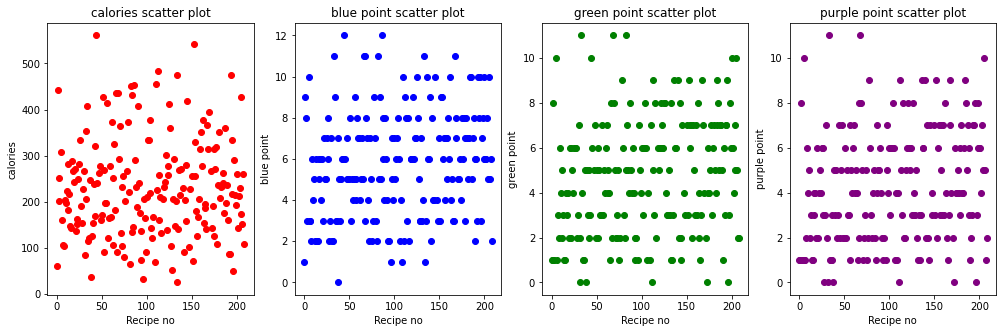

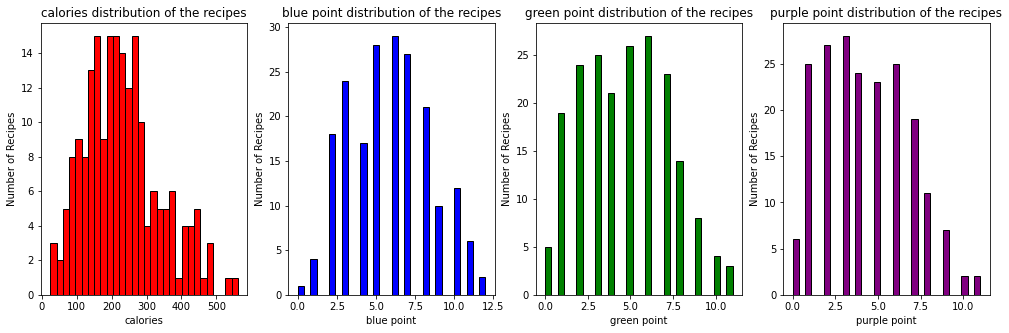

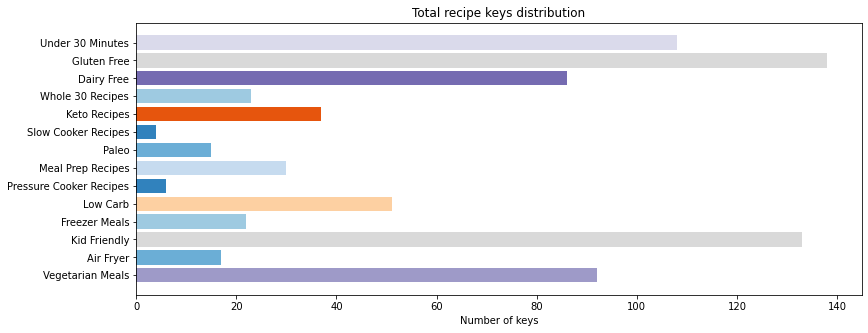

In [6]:
#%% Briefly analyse and visualize 

#drop all rows if there is nan in the column
df = df.dropna()
df = df[~df.calories.str.contains("Calories")]
#convert str to int for numerical cols
df[["blue point", "green point",  "purple point",  "calories"]] = df[["blue point", "green point",  "purple point",  "calories"]].apply(pd.to_numeric)

#save to external file
df.to_csv(r'recipe_file.csv', index = False)

#plot calorie and point distributions
indx = ['calories', 'blue point', 'green point', 'purple point'];
cols = ['red', 'blue', 'green', 'purple'];


get_ipython().run_line_magic('matplotlib', 'inline')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(17,5))
for i in range(4):
    ax[i].scatter(df.index, df[indx[i]],
                  color = cols[i])
            
    # Title and labels
    ax[i].set_title(indx[i] + ' scatter plot')
    ax[i].set_xlabel('Recipe no', size = 10)
    ax[i].set_ylabel(indx[i], size= 10) 

plt.show() 
     


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(17,5))
for i in range(4):
    ax[i].hist(df[indx[i]], bins = 30,
               color = cols[i], edgecolor = 'black')
            
    # Title and labels
    ax[i].set_title(indx[i] + ' distribution of the recipes')
    ax[i].set_xlabel(indx[i], size = 10)
    ax[i].set_ylabel('Number of Recipes', size= 10) 
plt.show()                


#get unique keys
keys_org= df['keys'].tolist()    
from itertools import chain
keys_all = list(chain(*keys_org))
keys_uniq = list(set(keys_all))

key_dist = np.zeros(len(keys_uniq))
for i in range(len(keys_uniq)):
    key_dist[i] = keys_all.count(keys_uniq[i])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
cols_map = cm.get_cmap('tab20c');
norm = Normalize(vmin=min(key_dist), vmax=max(key_dist))

ax.barh(keys_uniq,key_dist, color=cols_map(norm(key_dist)))
ax.set_title('Total recipe keys distribution')
ax.set_xlabel('Number of keys')
plt.show()       

In [7]:
User interaction

SyntaxError: invalid syntax (<ipython-input-7-bbf2b951e19d>, line 1)

In [8]:
#%% User interraction, input handling

# calorie collection
while True:
    input_cal_min = input('Please enter a minimum calorie for a recipe between ' + str(min(df['calories'])) + ' and ' + str(max(df['calories'])) + ': ')
    try:
        input_cal_min = int(input_cal_min)
    except ValueError:
        print("This is not a valid number. Please enter a valid number")
        
     
    if (isinstance(input_cal_min, int)):
        try:
            if input_cal_min<min(df['calories']) or input_cal_min>max(df['calories']):
                1/0
        except ZeroDivisionError:
            print('The calorie should be between'  + str(min(df['calories'])) + ' and ' + str(max(df['calories'])) + ' enter again ' )
        else:
            break

while True:
    input_cal_max = input('Please enter a maximum calorie for a recipe between ' + str(input_cal_min) + ' and ' + str(max(df['calories'])) + ': ')
    try:
        input_cal_max = int(input_cal_max)
    except ValueError:
        print("This is not a valid number. Please enter a valid number")
        
     
    if (isinstance(input_cal_max, int)):
        try:
            if input_cal_max<input_cal_min or input_cal_max>max(df['calories']):
                1/0
        except ZeroDivisionError:
            print('The calorie should be between'  + str(input_cal_min) + ' and ' + str(max(df['calories'])) + ' enter again ' )
        else:
            break



#%% color and point

# color collection
while True:
    input_color = input('Please enter a color, available colors are blue, green and purple: ')
    input_color = input_color.lower()
    try:
        if input_color!='blue' and input_color!='green' and input_color!='purple':
            1/0
    except ZeroDivisionError:
        print("This is not a valid color. Please enter a valid color")
        
    else:
        break
        
    
 # color range collection
while True:
    input_minp = input('Please enter a minimum point for color. Point should be between ' + str(min(df[str(input_color)+' point'])) + ' and ' + str(max(df[str(input_color)+' point'])) + ':')
    try:
        input_minp = int(input_minp)
    except ValueError:
        print("This is not a valid number. Please enter a valid number")
        
     
    if (isinstance(input_minp, int)):
        try:
            if input_minp<min(df[str(input_color)+' point']) or input_minp>max(df[str(input_color)+' point']):
                1/0
        except ZeroDivisionError:
            print("This is not a valid point. Point should be between " +str(min(df[str(input_color)+' point'])) + 'and ' + str(max(df[str(input_color)+' point'])) + ':')
        else:
            break
           
 # color range collection
while True:
    input_maxp = input('Please enter a maximum point for color. Point should be between ' + str(input_minp) + ' and ' + str(max(df[str(input_color)+' point'])) + ':')
    try:
        input_maxp = int(input_maxp)
    except ValueError:
        print("This is not a valid number. Please enter a valid number")
        
     
    if (isinstance(input_maxp, int)):
        try:
            if input_maxp< input_minp or input_maxp>max(df[str(input_color)+' point']):
                1/0
        except ZeroDivisionError:
            print("This is not a valid point. Point should be between " +str(input_minp) + 'and ' + str(max(df[str(input_color)+' point'])) + ':')
        else:
            break

Please enter a minimum calorie for a recipe between 25.0 and 561.0: 50
Please enter a maximum calorie for a recipe between 50 and 561.0: 500
Please enter a color, available colors are blue, green and purple: purple
Please enter a minimum point for color. Point should be between 0 and 11:5
Please enter a maximum point for color. Point should be between 5 and 11:10


Output 5 recipes depending on the user input. If there are no recipes suitable for user, then provide 5 random recipes.



----------------------------------------------
RECIPE 1:

Pumpkin Pistachio Energy Balls
Calorie: 138.0 kcal
These no-bake Pumpkin Pistachio Energy Balls literally taste like little bites of pumpkin pie. Made with cashews, pistachios, dates, pumpkin and spices. Pumpkin Pistachio Energy Balls You can whip...
Link to the recipe: https://www.skinnytaste.com/pumpkin-pistachio-energy-balls/


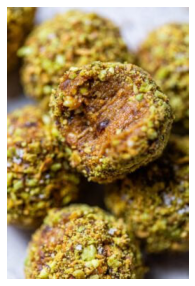



----------------------------------------------
RECIPE 2:

Dark Chocolate Peanut Butter Bark
Calorie: 144.0 kcal
Dark Chocolate Peanut Butter Bark with Sea Salt is so easy to make, just 3 ingredients! It makes a great homemade holiday gift! Dark Chocolate Peanut Butter Bark If...
Link to the recipe: https://www.skinnytaste.com/dark-chocolate-peanut-butter-bark/


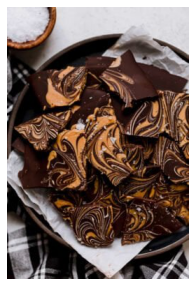



----------------------------------------------
RECIPE 3:

Orzo with Zucchini and Tomato
Calorie: 144.0 kcal
Orzo with Zucchini and Tomato is a quick and easy side dish that goes great with chicken, pork chops, or double the portion and enjoy it as a main...
Link to the recipe: https://www.skinnytaste.com/orzo-with-zucchini-and-tomato/


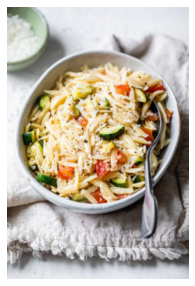



----------------------------------------------
RECIPE 4:

Flaugnarde of Mixed Berries (Clafoutis)
Calorie: 167.5 kcal
This warm berry custard called a Flaugnarde, similar to clafoutis, may sound fancy, but you won’t believe how easy it is to whip up! Flaugnarde of Mixed Berries (Clafoutis)...
Link to the recipe: https://www.skinnytaste.com/flaugnarde-of-mixed-berries-clafoutis/


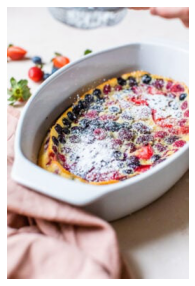



----------------------------------------------
RECIPE 5:

Easy Blueberry Buttermilk Cake
Calorie: 168.0 kcal
This light and Easy Blueberry Buttermilk Cake loaded with fresh, juicy blueberries in a lightly sweetened, moist buttermilk cake is ideal for summer. Easy Blueberry Buttermilk Cake I know...
Link to the recipe: https://www.skinnytaste.com/easy-blueberry-buttermilk-cake/


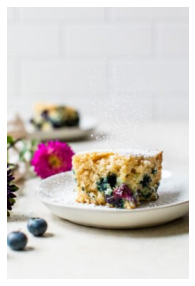

In [10]:
#%% Output for user

df3 = df[(df[str(input_color)+' point']< input_maxp) & (df[str(input_color)+' point']> input_minp)];  

df3 = df3.sort_values(by=['calories'])    

df3 = df3[(df3['calories']< input_cal_max) & (df3['calories']> input_cal_min)];  

       
#visualize first 5 recipes in df3
#%matplotlib inline

if 0<len(df3)<5:
    nr = len(df3);
    flag_random = 0;
elif len(df3)>=5:
    nr = 5;
    flag_random = 0;
else: 
    nr =5;
    flag_random = 1;
    
if flag_random==0:    
    for i in range(nr):
        print('\n\n----------------------------------------------')
        print('RECIPE ' + str(i+1) + ':\n')

        print(df3['title'].values[i])

        print('Calorie: ' + str(df3['calories'].values[i]) + ' kcal')

        print(df3['summary'].values[i])
        
        print('Link to the recipe: '+ df3['recipe link'].values[i])


        img_link = df3['image link'].values[i]
        #open image directly from url
        response = requests.get(img_link)
        img = Image.open(BytesIO(response.content))

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
        # plot raw pixel data
        ax.imshow(img)
        ax.axis('off')
        plt.show()
else:
    print('\n\n------------------------------------------------')
    print('Recipe with the following criterias was not found.\n') 
    
    print('color: ' + str(input_color)+ ' ' + str(input_minp) + ' to ' + str(input_maxp) + ' points\n')
    print(str(input_cal_min) + ' to ' + str(input_cal_max) + ' calories\n')
    
    print('Printing 5 random recipes.')
    
    for i in range(nr):
        nk = random.randint(0,len(df))
        print('\n\n----------------------------------------------')
        
        print('RECIPE ' + str(i+1) + ':\n')

        print(df['title'].values[nk])

        print('Calorie: ' + str(df['calories'].values[nk]) + ' kcal')

        print(df['summary'].values[nk])
        
        print('Link to the recipe: '+ df['recipe link'].values[nk])        


        img_link = df['image link'].values[nk]
        #open image directly from url
        response = requests.get(img_link)
        img = Image.open(BytesIO(response.content))
        

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
        # plot raw pixel data
        ax.imshow(img)
        ax.axis('off')
        plt.show()    